In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

## 1. Data Collection

In [2]:
now = datetime.now()
ticker = "^NSEI"
start = datetime(now.year - 10, now.month, now.day)
end = now
df = yf.download(ticker, start, end)

# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    diff = data.diff(1).dropna()
    gain = diff.mask(diff < 0, 0)
    loss = diff.mask(diff > 0, 0).abs()
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df['Close'])

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    short_ema = data.ewm(span=short_window, adjust=False).mean()
    long_ema = data.ewm(span=long_window, adjust=False).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=signal_window, adjust=False).mean()
    return macd, signal_line

macd, signal_line = calculate_macd(df['Close'])
df['MACD'] = macd
df['MACD_Signal'] = signal_line

# Calculate EMA 50
df['EMA_50'] = df['Close'].ewm(span=50, adjust=False).mean()

# Calculate SMA 20
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# Calculate Stochastic RSI
def calculate_stoch_rsi(data, window=14, k_window=3, d_window=3):
    rsi = calculate_rsi(data, window)
    min_rsi = rsi.rolling(window=window).min()
    max_rsi = rsi.rolling(window=window).max()
    stoch_rsi = (rsi - min_rsi) / (max_rsi - min_rsi)
    k_line = stoch_rsi.rolling(window=k_window).mean()
    d_line = k_line.rolling(window=d_window).mean()
    return k_line, d_line

df['StochRSI_K'], df['StochRSI_D'] = calculate_stoch_rsi(df['Close'])

df.dropna(inplace=True)
df = df.reset_index(drop=True)

C:\Users\Krish Patel\AppData\Local\Temp\ipykernel_20864\2183070477.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
0,7368.850098,7380.350098,7308.149902,7321.700195,338500,65.888113,-47.033910,-66.948932,7257.228239,7170.752539,0.835695,0.602622
1,7475.600098,7483.950195,7406.049805,7429.549805,278600,68.493658,-18.072276,-57.173601,7265.791841,7174.332544,1.000000,0.826492
2,7485.350098,7505.899902,7444.100098,7505.399902,281700,63.835717,5.602193,-44.618442,7274.401969,7174.145044,0.960188,0.931961
3,7485.299805,7527.149902,7442.149902,7486.399902,257000,70.802976,24.082711,-30.878211,7282.672472,7179.047534,0.960188,0.973458
4,7531.799805,7539.000000,7424.299805,7436.100098,245100,70.417150,41.996704,-16.303228,7292.442172,7190.727515,0.957074,0.959150


In [4]:
df.tail()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
2429,25683.300781,25940.599609,25623.000000,25840.400391,348800,40.461616,10.851184,48.472752,25902.662488,26034.217676,0.471083,0.729658
2430,25790.250000,25813.150391,25473.400391,25669.050781,275800,36.203471,-8.577432,37.062715,25898.254155,26021.382715,0.143917,0.470349
2431,25732.300781,25899.800781,25603.300781,25897.349609,339500,34.533968,-28.324264,23.985319,25891.746179,26006.632715,0.000000,0.205000
2432,25665.599609,25791.750000,25603.949219,25648.550781,393100,33.790320,-48.793536,9.429548,25882.877686,25996.907715,0.000000,0.047972
2433,25694.349609,25873.500000,25662.400391,25696.050781,0,37.562085,-61.981216,-4.852605,25875.484428,25990.697656,0.041381,0.013794


## 2. Data Exploraion & Visualization

In [5]:
df

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
0,7368.850098,7380.350098,7308.149902,7321.700195,338500,65.888113,-47.033910,-66.948932,7257.228239,7170.752539,0.835695,0.602622
1,7475.600098,7483.950195,7406.049805,7429.549805,278600,68.493658,-18.072276,-57.173601,7265.791841,7174.332544,1.000000,0.826492
2,7485.350098,7505.899902,7444.100098,7505.399902,281700,63.835717,5.602193,-44.618442,7274.401969,7174.145044,0.960188,0.931961
3,7485.299805,7527.149902,7442.149902,7486.399902,257000,70.802976,24.082711,-30.878211,7282.672472,7179.047534,0.960188,0.973458
4,7531.799805,7539.000000,7424.299805,7436.100098,245100,70.417150,41.996704,-16.303228,7292.442172,7190.727515,0.957074,0.959150
...,...,...,...,...,...,...,...,...,...,...,...,...
2429,25683.300781,25940.599609,25623.000000,25840.400391,348800,40.461616,10.851184,48.472752,25902.662488,26034.217676,0.471083,0.729658
2430,25790.250000,25813.150391,25473.400391,25669.050781,275800,36.203471,-8.577432,37.062715,25898.254155,26021.382715,0.143917,0.470349
2431,25732.300781,25899.800781,25603.300781,25897.349609,339500,34.533968,-28.324264,23.985319,25891.746179,26006.632715,0.000000,0.205000


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(2434, 12)

In [8]:
df.isna().sum()

Price        Ticker
Close        ^NSEI     0
High         ^NSEI     0
Low          ^NSEI     0
Open         ^NSEI     0
Volume       ^NSEI     0
RSI                    0
MACD                   0
MACD_Signal            0
EMA_50                 0
SMA_20                 0
StochRSI_K             0
StochRSI_D             0
dtype: int64

In [9]:
df.describe()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
count,2434.000000,2434.000000,2434.000000,2434.000000,2.434000e+03,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000,2434.000000
mean,15322.711186,15400.217971,15241.033003,15331.240552,3.384728e+05,56.115593,53.884251,53.774021,15135.258886,15249.249438,0.502854,0.503064
std,5622.023862,5642.266164,5601.041448,5621.733549,1.904617e+05,17.150454,162.250867,152.966837,5551.697946,5599.541273,0.341493,0.328397
min,7368.850098,7380.350098,7308.149902,7321.700195,0.000000e+00,2.022397,-1005.837460,-848.332753,7257.228239,7170.752539,0.000000,0.000000
25%,10566.612305,10620.087402,10516.237549,10581.887207,2.179000e+05,43.486063,-27.206011,-22.829817,10553.796127,10563.932520,0.177352,0.190229
50%,14564.149902,14659.899902,14447.600098,14577.150391,2.808500e+05,56.059825,65.653409,63.745284,14133.836221,14579.441187,0.493423,0.491656
75%,19383.638184,19441.587402,19307.724609,19385.261719,4.041000e+05,68.499094,146.952085,143.522284,19105.437445,19354.370630,0.844556,0.825482
max,26328.550781,26373.199219,26210.050781,26333.699219,1.811000e+06,100.000000,451.083428,413.985339,25913.035064,26044.980176,1.000000,1.000000


In [10]:
df.head()

Price,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
0,7368.850098,7380.350098,7308.149902,7321.700195,338500,65.888113,-47.033910,-66.948932,7257.228239,7170.752539,0.835695,0.602622
1,7475.600098,7483.950195,7406.049805,7429.549805,278600,68.493658,-18.072276,-57.173601,7265.791841,7174.332544,1.000000,0.826492
2,7485.350098,7505.899902,7444.100098,7505.399902,281700,63.835717,5.602193,-44.618442,7274.401969,7174.145044,0.960188,0.931961
3,7485.299805,7527.149902,7442.149902,7486.399902,257000,70.802976,24.082711,-30.878211,7282.672472,7179.047534,0.960188,0.973458
4,7531.799805,7539.000000,7424.299805,7436.100098,245100,70.417150,41.996704,-16.303228,7292.442172,7190.727515,0.957074,0.959150


In [11]:
df = df.reset_index()

In [12]:
df.head()

Price,index,Close,High,Low,Open,Volume,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI,,,,,,,
0,0,7368.850098,7380.350098,7308.149902,7321.700195,338500,65.888113,-47.033910,-66.948932,7257.228239,7170.752539,0.835695,0.602622
1,1,7475.600098,7483.950195,7406.049805,7429.549805,278600,68.493658,-18.072276,-57.173601,7265.791841,7174.332544,1.000000,0.826492
2,2,7485.350098,7505.899902,7444.100098,7505.399902,281700,63.835717,5.602193,-44.618442,7274.401969,7174.145044,0.960188,0.931961
3,3,7485.299805,7527.149902,7442.149902,7486.399902,257000,70.802976,24.082711,-30.878211,7282.672472,7179.047534,0.960188,0.973458
4,4,7531.799805,7539.000000,7424.299805,7436.100098,245100,70.417150,41.996704,-16.303228,7292.442172,7190.727515,0.957074,0.959150


Text(0, 0.5, 'Close price')

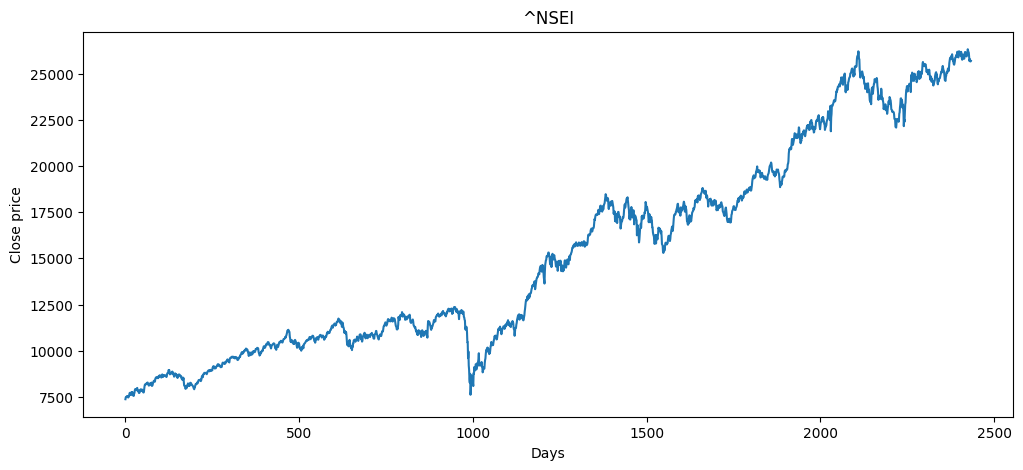

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close price')

## 3. Feature Engineering

In [14]:
features = ['Open','Close', 'RSI', 'MACD', 'MACD_Signal', 'EMA_50', 'SMA_20', 'StochRSI_K', 'StochRSI_D']
data_to_process = df[features]

In [15]:
train_size = int(len(data_to_process) * 0.7)
data_training = data_to_process.iloc[:train_size]
data_testing = data_to_process.iloc[train_size:]

In [16]:
data_training.head()

Price,Open,Close,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,,,,,,,
0,7321.700195,7368.850098,65.888113,-47.033910,-66.948932,7257.228239,7170.752539,0.835695,0.602622
1,7429.549805,7475.600098,68.493658,-18.072276,-57.173601,7265.791841,7174.332544,1.000000,0.826492
2,7505.399902,7485.350098,63.835717,5.602193,-44.618442,7274.401969,7174.145044,0.960188,0.931961
3,7486.399902,7485.299805,70.802976,24.082711,-30.878211,7282.672472,7179.047534,0.960188,0.973458
4,7436.100098,7531.799805,70.417150,41.996704,-16.303228,7292.442172,7190.727515,0.957074,0.959150


In [17]:
data_testing.head()

Price,Open,Close,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,,,,,,,
1703,17731.449219,17662.150391,40.211335,-112.492513,-80.380651,18039.862403,17957.309863,0.142057,0.338928
1704,17811.599609,17616.300781,39.373265,-125.155878,-89.335696,18023.252143,17926.497363,0.191804,0.201519
1705,17517.099609,17610.400391,40.343007,-134.121726,-98.292902,18007.061878,17904.869922,0.297729,0.210530
1706,17721.750000,17854.050781,46.409988,-120.181300,-102.670582,18001.061443,17897.964941,0.410548,0.300027
1707,17818.550781,17764.599609,45.526985,-115.025432,-105.141552,17991.788430,17893.222461,0.522549,0.410276


## 4. Data Preprocessing

In [18]:
df.shape

(2434, 13)

In [19]:
# Spliting data into Traning & Testing datasets
train_size = int(len(data_to_process) * 0.7)
data_training = data_to_process.iloc[:train_size]
data_testing = data_to_process.iloc[train_size:]

In [20]:
# Scaling down data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
import joblib

In [21]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(data_training)
joblib.dump(scaler, 'scaler.gz')
data_training_array = scaler.transform(data_training)

In [22]:
data_training_array.shape

(1703, 9)

## 5. Sequence Creation

In [23]:
x_train = []
y_train = []
time_step = 100

# Get the indices for 'Close' and 'Open' from the features list
close_index = features.index('Close')
open_index = features.index('Open')

for i in range(time_step, data_training_array.shape[0]):
    x_train.append(data_training_array[i-time_step: i])
    y_train.append(data_training_array[i, [close_index, open_index]])

x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train

array([[[0.00000000e+00, 0.00000000e+00, 6.37316315e-01, ...,
         0.00000000e+00, 8.35694964e-01, 6.02621714e-01],
        [9.33742720e-03, 9.32831753e-03, 6.65362298e-01, ...,
         3.14639748e-04, 1.00000000e+00, 8.26491520e-01],
        [1.59043936e-02, 1.01803184e-02, 6.15224407e-01, ...,
         2.98160733e-04, 9.60187599e-01, 9.31960854e-01],
        ...,
        [1.13594937e-01, 1.06766661e-01, 6.94268668e-01, ...,
         1.11601163e-01, 4.14792324e-01, 4.55763305e-01],
        [1.10621008e-01, 1.08964335e-01, 7.05793131e-01, ...,
         1.13745411e-01, 4.25501783e-01, 4.21288910e-01],
        [1.13872004e-01, 1.13377263e-01, 7.45951785e-01, ...,
         1.15776943e-01, 4.27412173e-01, 4.22568760e-01]],

       [[9.33742720e-03, 9.32831753e-03, 6.65362298e-01, ...,
         3.14639748e-04, 1.00000000e+00, 8.26491520e-01],
        [1.59043936e-02, 1.01803184e-02, 6.15224407e-01, ...,
         2.98160733e-04, 9.60187599e-01, 9.31960854e-01],
        [1.42594075e-02, 

In [25]:
y_train

array([[0.11094799, 0.1165862 ],
       [0.11077757, 0.1153741 ],
       [0.10958482, 0.11478108],
       ...,
       [0.91955794, 0.93259023],
       [0.89442613, 0.91387632],
       [0.89832346, 0.88485097]], shape=(1603, 2))

In [26]:
x_train.shape

(1603, 100, 9)

In [27]:
y_train.shape

(1603, 2)

In [28]:
x_train.ndim

3

In [29]:
y_train.ndim

2

## 6. Model Building

In [30]:
import tensorflow as tf
tf.__version__

'2.20.0'

In [31]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [32]:
model = Sequential()

model.add(Input(shape=(100, x_train.shape[2])))
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) # Give Sequence of output
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(2))

## 7. Model Training

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0165
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 8.7246e-04
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - loss: 7.2697e-04
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 6.4366e-04
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 90ms/step - loss: 6.2355e-04
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 6.1882e-04
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 91ms/step - loss: 5.8966e-04
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 85ms/step - loss: 4.9771e-04
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 88ms/step - loss: 4.7673e-04
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 99ms/step - loss: 5.0968e-04
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - loss: 4.5319e-04
Epoch 12/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 98ms/step - loss: 4.6473e-04
Epoch 13/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - loss: 4.2609e-04
Epoch 14/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 227ms/step - loss: 4.2099e-04


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        70,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365,225 (1.39 MB)

 Trainable params: 121,741 (475.55 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,484 (951.11 KB)

In [35]:
# Save the trained model
model.save('Model_v1.keras')

## 8. Preparing Test Data

In [36]:
past_100_days = data_training.tail(100)
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [37]:
past_100_days

Price,Open,Close,RSI,MACD,MACD_Signal,EMA_50,SMA_20,StochRSI_K,StochRSI_D
Ticker,^NSEI,^NSEI,,,,,,,
1603,17519.400391,17624.400391,41.071917,172.080629,222.963230,17121.319842,17637.809961,0.014678,0.021063
1604,17748.150391,17798.750000,45.962076,175.800522,213.530688,17147.885730,17651.492480,0.038423,0.022593
1605,17923.349609,17833.349609,52.092302,179.471626,206.718876,17174.766667,17666.422461,0.205768,0.086290
1606,17890.849609,17936.349609,63.711018,188.519110,203.078922,17204.632664,17680.289941,0.539101,0.261097
1607,18044.449219,18070.050781,64.728908,204.124850,203.288108,17238.570630,17698.884961,0.834011,0.526293
...,...,...,...,...,...,...,...,...,...
1698,18118.449219,18118.550781,46.242836,-47.610190,-71.937196,18098.283690,18048.452441,0.745112,0.798500
1699,18183.949219,18118.300781,52.837566,-38.600497,-65.269856,18099.068674,18047.752441,0.773814,0.771448
1700,18093.349609,17891.949219,46.667299,-49.158263,-62.047537,18090.946342,18036.224902,0.803526,0.774151


In [38]:
input_data = scaler.transform(final_df)
input_data

array([[0.88289873, 0.89617826, 0.37019577, ..., 0.91992956, 0.01467836,
        0.02106323],
       [0.9027035 , 0.91141375, 0.42283325, ..., 0.92113209, 0.0384232 ,
        0.0225933 ],
       [0.91787193, 0.91443723, 0.48881875, ..., 0.92244426, 0.20576762,
        0.08628973],
       ...,
       [1.60824666, 1.60468477, 0.29982154, ..., 1.6554493 , 0.        ,
        0.20500014],
       [1.5867061 , 1.59885611, 0.29181695, ..., 1.65459459, 0.        ,
        0.0479724 ],
       [1.59081857, 1.60136842, 0.33241607, ..., 1.6540488 , 0.04138147,
        0.01379382]], shape=(831, 9))

In [39]:
input_data.shape

(831, 9)

In [40]:
x_test = []
y_test = []

close_index = features.index('Close')
open_index = features.index('Open')

for i in range(time_step, input_data.shape[0]):
    x_test.append(input_data[i-time_step:i])
    y_test.append(input_data[i, [close_index, open_index]])

x_test, y_test = np.array(x_test), np.array(y_test)

In [41]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [42]:
x_test

array([[[0.88289873, 0.89617826, 0.37019577, ..., 0.91992956,
         0.01467836, 0.02106323],
        [0.9027035 , 0.91141375, 0.42283325, ..., 0.92113209,
         0.0384232 , 0.0225933 ],
        [0.91787193, 0.91443723, 0.48881875, ..., 0.92244426,
         0.20576762, 0.08628973],
        ...,
        [0.93259023, 0.91955794, 0.43042424, ..., 0.95494548,
         0.80352649, 0.77415098],
        [0.91387632, 0.89442613, 0.38350029, ..., 0.9523675 ,
         0.60402961, 0.72712336],
        [0.88485097, 0.89832346, 0.29970483, ..., 0.95036211,
         0.27069628, 0.55941746]],

       [[0.9027035 , 0.91141375, 0.42283325, ..., 0.92113209,
         0.0384232 , 0.0225933 ],
        [0.91787193, 0.91443723, 0.48881875, ..., 0.92244426,
         0.20576762, 0.08628973],
        [0.91505814, 0.92343785, 0.61388215, ..., 0.92366304,
         0.53910096, 0.26109726],
        ...,
        [0.91387632, 0.89442613, 0.38350029, ..., 0.9523675 ,
         0.60402961, 0.72712336],
        [0.8

In [43]:
y_test

array([[0.89947704, 0.90125754],
       [0.89547048, 0.90819682],
       [0.89495488, 0.88269953],
       ...,
       [1.60468477, 1.60824666],
       [1.59885611, 1.5867061 ],
       [1.60136842, 1.59081857]], shape=(731, 2))

## 9. Making Prediction

In [59]:
y_predicted = model.predict(x_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


In [45]:
y_predicted

array([[0.89829737, 0.8839393 ],
       [0.9093282 , 0.89575344],
       [0.9048786 , 0.89091265],
       ...,
       [1.5504038 , 1.5232726 ],
       [1.5453577 , 1.5179219 ],
       [1.5383217 , 1.5101694 ]], shape=(731, 2), dtype=float32)

In [46]:
y_test

array([[0.89947704, 0.90125754],
       [0.89547048, 0.90819682],
       [0.89495488, 0.88269953],
       ...,
       [1.60468477, 1.60824666],
       [1.59885611, 1.5867061 ],
       [1.60136842, 1.59081857]], shape=(731, 2))

In [60]:
dummy_array = np.zeros(shape=(len(y_predicted), len(features)))
# dummy_array[:, 0] = y_predicted.flatten()

In [61]:
# Create a dummy array with the shape of the original features to inverse transform the predicted values
# Only the 'Close' and 'Open' columns will be populated with predictions
dummy_array = np.zeros(shape=(len(y_predicted), len(features)))

close_index = features.index('Close')
open_index = features.index('Open')

dummy_array[:, close_index] = y_predicted[:, 0]
dummy_array[:, open_index] = y_predicted[:, 1]

y_predicted_final = scaler.inverse_transform(dummy_array)

In [49]:
y_predicted_final

array([[1.75314195e+04, 1.76486507e+04, 6.67976424e+00, ...,
        7.17075254e+03, 0.00000000e+00, 0.00000000e+00],
       [1.76678755e+04, 1.77748839e+04, 6.67976424e+00, ...,
        7.17075254e+03, 0.00000000e+00, 0.00000000e+00],
       [1.76119632e+04, 1.77239642e+04, 6.67976424e+00, ...,
        7.17075254e+03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [2.49158784e+04, 2.51111288e+04, 6.67976424e+00, ...,
        7.17075254e+03, 0.00000000e+00, 0.00000000e+00],
       [2.48540764e+04, 2.50533826e+04, 6.67976424e+00, ...,
        7.17075254e+03, 0.00000000e+00, 0.00000000e+00],
       [2.47645327e+04, 2.49728655e+04, 6.67976424e+00, ...,
        7.17075254e+03, 0.00000000e+00, 0.00000000e+00]], shape=(731, 9))

In [62]:
# Create a dummy array with the shape of the original features to inverse transform the actual values
# Only the 'Close' and 'Open' columns will be populated with actual values
dummy_y_test = np.zeros(shape=(len(y_test), len(features)))

close_index = features.index('Close')
open_index = features.index('Open')

dummy_y_test[:, close_index] = y_test[:, 0]
dummy_y_test[:, open_index] = y_test[:, 1]


y_test_actual = scaler.inverse_transform(dummy_y_test)

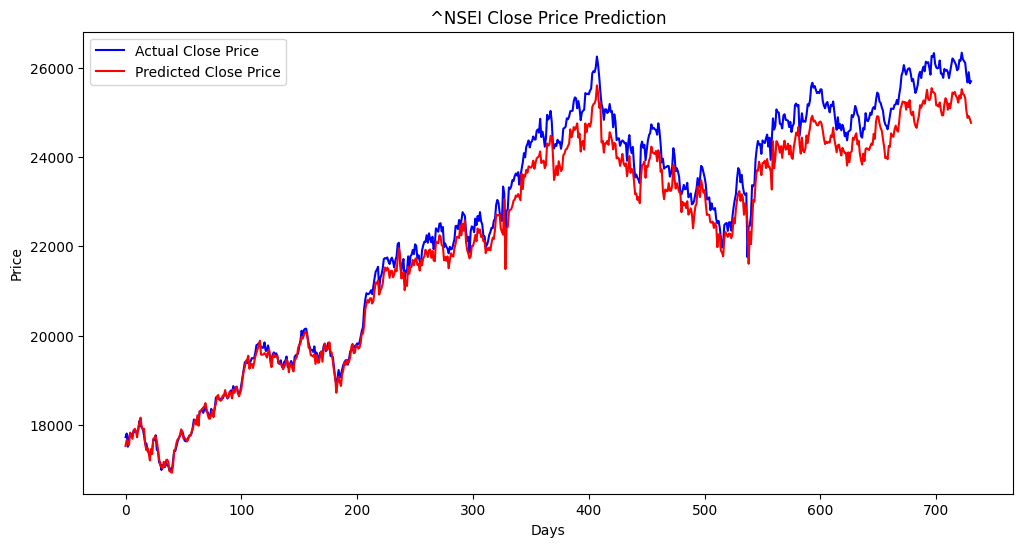

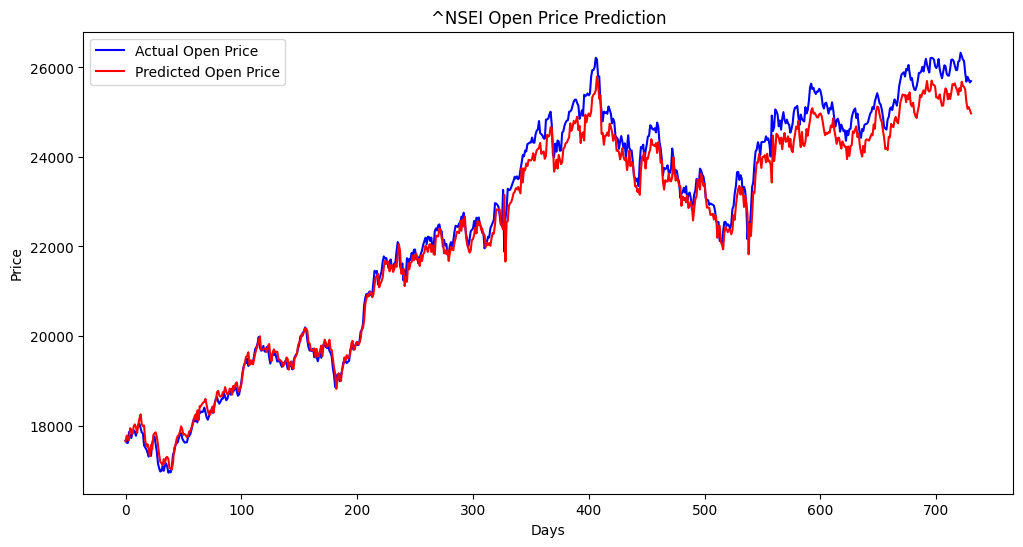

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 0], 'b', label='Actual Close Price')
plt.plot(y_predicted_final[:, 0], 'r', label='Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title(f"{ticker} Close Price Prediction")
plt.legend()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 1], 'b', label='Actual Open Price')
plt.plot(y_predicted_final[:, 1], 'r', label='Predicted Open Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.title(f"{ticker} Open Price Prediction")
plt.legend()
plt.show()

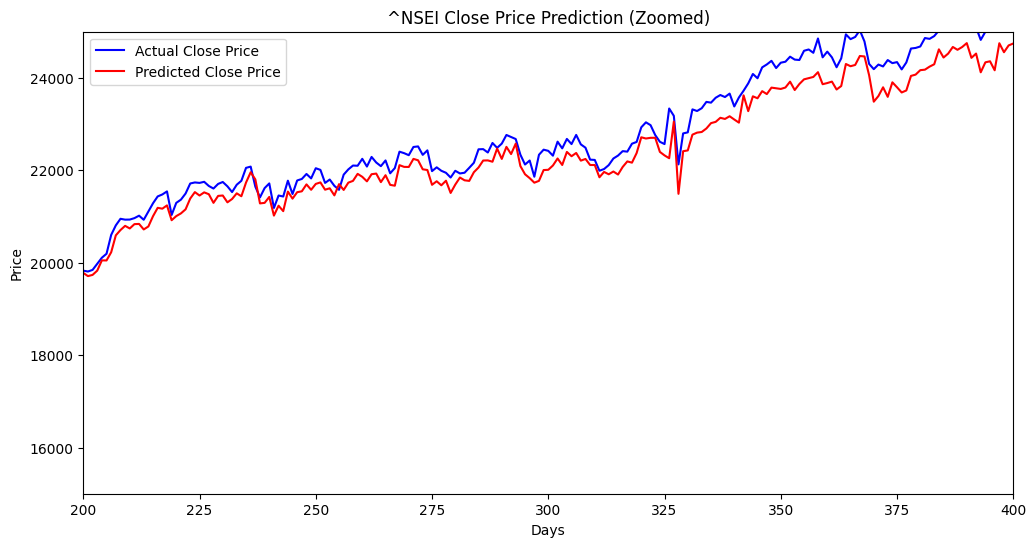

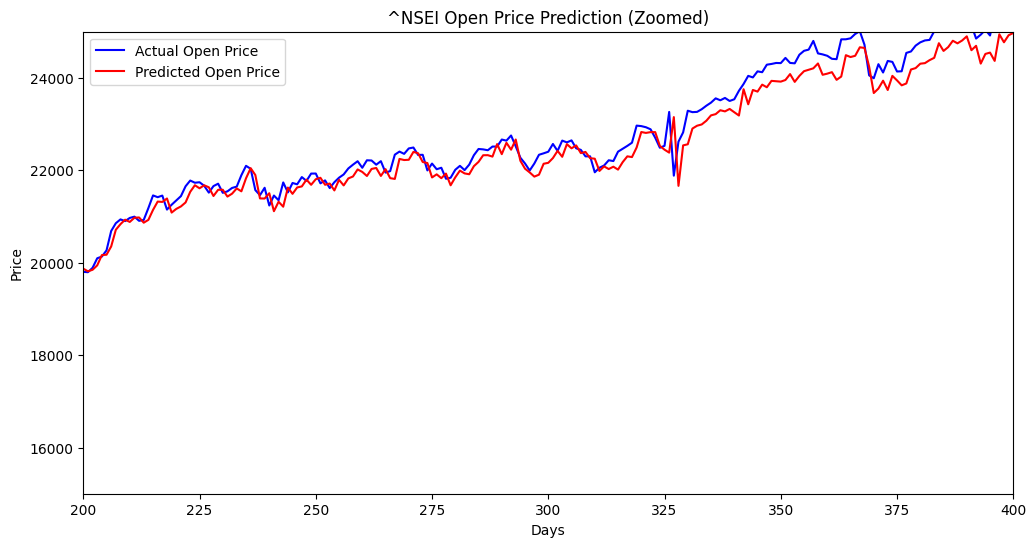

In [64]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 0], 'b', label = 'Actual Close Price')
plt.plot(y_predicted_final[:, 0], 'r', label = 'Predicted Close Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(200, 400)
plt.ylim(15000, 25000)
plt.title(f"{ticker} Close Price Prediction (Zoomed)")
plt.show()

plt.figure(figsize=(12,6))
plt.plot(y_test_actual[:, 1], 'b', label = 'Actual Open Price')
plt.plot(y_predicted_final[:, 1], 'r', label = 'Predicted Open Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(200, 400)
plt.ylim(15000, 25000)
plt.title(f"{ticker} Open Price Prediction (Zoomed)")
plt.show()

## 10. Model Evaluation

In [53]:
# MSE
from sklearn.metrics import mean_squared_error, r2_score

In [54]:
# Calculate MSE for Close and Open prices separately
mse_close = mean_squared_error(y_test[:, 0], y_predicted[:, 0])
mse_open = mean_squared_error(y_test[:, 1], y_predicted[:, 1])

print(f"Mean Squred Error (MSE) for Close Price: {mse_close}")
print(f"Mean Squred Error (MSE) for Open Price: {mse_open}")

Mean Squred Error (MSE) for Close Price: 0.000983904309195534
Mean Squred Error (MSE) for Open Price: 0.001606102532307609


In [65]:
np.mean(
    np.sign(y_predicted_final[1:] - y_test_actual[:-1]) ==
    np.sign(y_test_actual[1:] - y_test_actual[:-1])
)


np.float64(0.8951293759512937)

In [55]:
# Calculate RMSE for Close and Open prices separately
rmse_close = np.sqrt(mean_squared_error(y_test[:, 0], y_predicted[:, 0]))
rmse_open = np.sqrt(mean_squared_error(y_test[:, 1], y_predicted[:, 1]))

print(f"Root Mean Squred Error (RMSE) for Close Price: {rmse_close}")
print(f"Root Mean Squred Error (RMSE) for Open Price: {rmse_open}")

Root Mean Squred Error (RMSE) for Close Price: 0.031367248989918356
Root Mean Squred Error (RMSE) for Open Price: 0.04007620905609223


NameError: name 'y_pred_actual' is not defined

In [56]:
# Calculate R-Squared for Close and Open prices separately
r2_close = r2_score(y_test[:, 0], y_predicted[:, 0])
r2_open = r2_score(y_test[:, 1], y_predicted[:, 1])

print(f"R-Squared for Close Price: {r2_close}")
print(f"R-Squared for Open Price: {r2_open}")

R-Squared for Close Price: 0.981954876588446
R-Squared for Open Price: 0.9699692741227658


In [57]:
# Print model confidence for Close and Open prices separately
r2_close = r2_score(y_test[:, 0], y_predicted[:, 0])
r2_open = r2_score(y_test[:, 1], y_predicted[:, 1])

print(f"Model Confidence (R-squared) for Close Price: {(r2_close * 100):.2f}%")
print(f"Model Confidence (R-squared) for Open Price: {(r2_open * 100):.2f}%")

Model Confidence (R-squared) for Close Price: 98.20%
Model Confidence (R-squared) for Open Price: 97.00%
